# Download and import dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tensorflow-hub opencv-python matplotlib

  Using cached opencv_python-4.5.4.58-cp37-cp37m-win_amd64.whl (35.1 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-win_amd64.whl size=34473 sha256=0d6e7925331f62dd76a607c7542a8627fc9814f17dd3b31ed34b8dfc1e3ae596
  Stored in directory: c:\users\bobby\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt

ERROR: astroid 2.3.3 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.



  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.9.0
    Uninstalling absl-py-0.9.0:
      Successfully uninstalled absl-py-0.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.27.2


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load model

In [3]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

# Make detections (std video capture code)

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
frame

array([[[255, 255, 246],
        [255, 255, 246],
        [255, 255, 246],
        ...,
        [114, 109, 113],
        [115, 110, 112],
        [116, 111, 113]],

       [[255, 255, 241],
        [255, 255, 241],
        [255, 255, 241],
        ...,
        [119, 111, 112],
        [122, 111, 112],
        [122, 111, 112]],

       [[255, 255, 244],
        [255, 255, 244],
        [255, 255, 244],
        ...,
        [114, 110, 111],
        [115, 110, 111],
        [116, 111, 112]],

       ...,

       [[128, 117,  95],
        [134, 124,  96],
        [129, 118,  85],
        ...,
        [ 32,  51,  68],
        [ 38,  55,  71],
        [ 39,  56,  73]],

       [[125, 114, 112],
        [136, 125, 124],
        [130, 119, 118],
        ...,
        [ 25,  50,  68],
        [ 26,  51,  70],
        [ 28,  54,  72]],

       [[122,  98,  57],
        [141, 120,  79],
        [137, 119,  78],
        ...,
        [ 32,  52,  77],
        [ 32,  52,  77],
        [ 32,  52,  77]]

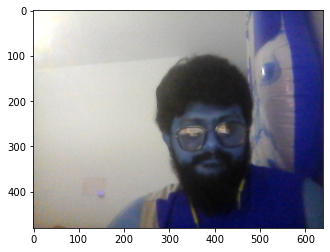

In [6]:
plt.imshow(frame)

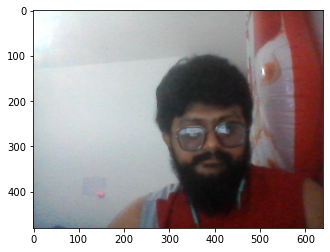

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# update the previous code for video capture

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #resize the image and detect
    img = frame.copy() #copy of the frame
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    #detection section
    results =  movenet(input_img)
    print(results)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.49180984e-01, 2.11097121e-01, 4.59156275e-01, 5.28960288e-01,
         2.25845724e-01, 4.34299648e-01, 5.22248447e-01, 1.86824277e-01,
         4.21966016e-01, 5.31602085e-01, 2.29496494e-01, 3.70143950e-01,
         5.19732475e-01, 1.40255615e-01, 5.00955880e-01, 6.21876001e-01,
         2.65574068e-01, 6.47244811e-01, 6.16739511e-01, 3.71700712e-02,
         6.63688481e-01, 7.62556672e-01, 3.07017207e-01, 2.63184607e-01,
         7.59967685e-01, 2.32139882e-02, 3.93483043e-01, 8.49384308e-01,
         2.40921423e-01, 1.69932395e-01, 8.29288840e-01, 5.55871911e-02,
         1.34364471e-01, 8.49658966e-01, 2.23911285e-01, 4.87521648e-01,
         8.54674280e-01, 9.86115709e-02, 4.19149071e-01, 8.12090695e-01,
         3.01901966e-01, 7.96925202e-02, 8.34016144e-01, 2.44158357e-02,
         1.18971974e-01, 8.64026010e-01, 1.89833015e-01, 1.08673476e-01,
         8.59627187e-01, 1.89956158e-01, 8.13125446e-02, 4.

      dtype=float32)>}
{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[6.00905836e-01, 5.21815658e-01, 6.58359468e-01, 5.35077631e-01,
         5.74674547e-01, 4.02777851e-01, 5.42001367e-01, 4.47396904e-01,
         4.98379856e-01, 5.44340312e-01, 6.27212286e-01, 6.40262187e-01,
         5.56913793e-01, 3.68531704e-01, 6.97047889e-01, 7.38166094e-01,
         7.92416155e-01, 4.14747238e-01, 7.77497351e-01, 2.55504102e-01,
         4.44859594e-01, 8.68656993e-01, 8.55965078e-01, 1.21064596e-01,
         8.75900209e-01, 1.86364472e-01, 1.19945921e-01, 7.80318141e-01,
         7.14695394e-01, 4.68328521e-02, 7.44271100e-01, 3.32075030e-01,
         1.21394627e-01, 8.72363150e-01, 6.87360227e-01, 2.11088862e-02,
         8.53777885e-01, 4.07943696e-01, 6.92010112e-03, 8.10373962e-01,
         7.22128749e-01, 1.39236590e-02, 7.80894876e-01, 3.66295636e-01,
         2.32291277e-02, 4.78971094e-01, 6.44273460e-01, 2.52591609e-03,
         5.78507721e-01, 4.80353624e

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.88574946e-01, 5.24712563e-01, 6.56512678e-01, 5.26595116e-01,
         5.81322253e-01, 5.97828090e-01, 5.29460728e-01, 4.56843257e-01,
         6.05065107e-01, 5.47430515e-01, 6.40463471e-01, 5.39928794e-01,
         5.60471892e-01, 3.81898761e-01, 6.28215492e-01, 7.43494809e-01,
         7.91784465e-01, 5.35738528e-01, 7.95599282e-01, 2.74931192e-01,
         5.32190323e-01, 8.66545200e-01, 8.48973215e-01, 3.16212773e-02,
         8.73392880e-01, 1.90223724e-01, 9.02281776e-02, 8.38689983e-01,
         6.99692011e-01, 4.74334247e-02, 7.35328138e-01, 3.23684543e-01,
         5.06634004e-02, 8.77418578e-01, 7.23191977e-01, 6.42385706e-03,
         8.65162551e-01, 4.35151190e-01, 1.79725431e-03, 7.79808521e-01,
         7.79317737e-01, 1.68280229e-02, 7.85756111e-01, 3.86674851e-01,
         1.25263780e-02, 4.40128207e-01, 6.29994035e-01, 1.51858327e-03,
         4.52750385e-01, 6.11881554e-01, 2.30618971e-04, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.96498013e-01, 5.16959429e-01, 6.52452528e-01, 5.28773189e-01,
         5.72944283e-01, 5.49165905e-01, 5.39467871e-01, 4.50809360e-01,
         4.67350513e-01, 5.38714349e-01, 6.33297980e-01, 6.41960919e-01,
         5.67687631e-01, 3.84824932e-01, 6.26309752e-01, 7.46459663e-01,
         7.75456965e-01, 4.55315530e-01, 7.76956916e-01, 3.15184861e-01,
         2.67728209e-01, 8.63625705e-01, 8.44406128e-01, 9.36447531e-02,
         8.66340697e-01, 1.88384950e-01, 1.42237619e-01, 8.19104016e-01,
         7.37096608e-01, 3.73693593e-02, 6.59422338e-01, 3.30933750e-01,
         1.69560328e-01, 8.61886024e-01, 7.05107749e-01, 7.10684657e-02,
         8.53343248e-01, 4.28381175e-01, 3.75987291e-02, 7.92675734e-01,
         7.78299987e-01, 2.62876581e-02, 8.01483333e-01, 4.09984857e-01,
         2.30501797e-02, 4.49177414e-01, 6.57754540e-01, 1.44259247e-03,
         5.20069182e-01, 4.13224727e-01, 8.01793532e-04, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.9385169e-01, 5.0380927e-01, 6.5838253e-01, 5.2275199e-01,
         5.5934882e-01, 5.6255394e-01, 5.3958297e-01, 4.3861336e-01,
         6.0057384e-01, 5.3530729e-01, 6.2473768e-01, 5.1192397e-01,
         5.7687968e-01, 3.7222049e-01, 6.1719251e-01, 7.4009889e-01,
         7.7749038e-01, 5.8342046e-01, 7.7919781e-01, 2.9407424e-01,
         3.9411718e-01, 8.7027675e-01, 8.3370602e-01, 5.3069122e-02,
         8.6904460e-01, 1.8195410e-01, 1.2664130e-01, 7.9408622e-01,
         6.9801801e-01, 3.5000920e-02, 6.7422557e-01, 2.9157576e-01,
         7.8399174e-02, 8.7385601e-01, 7.4042034e-01, 2.5757736e-02,
         8.6231703e-01, 4.7293168e-01, 1.1512162e-02, 8.5113937e-01,
         7.6210362e-01, 2.0115979e-02, 8.3187860e-01, 3.7654209e-01,
         1.4998801e-02, 3.9979193e-01, 7.0606077e-01, 1.4463629e-03,
         4.3784592e-01, 5.8837515e-01, 1.4452214e-04, 2.9815924e-01,
         1.5429032e-01, 8.7137139e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.88115156e-01, 5.03997326e-01, 6.85568810e-01, 5.24599195e-01,
         5.59335768e-01, 6.43034220e-01, 5.34080923e-01, 4.35017288e-01,
         5.31771362e-01, 5.44919014e-01, 6.18402958e-01, 5.86070120e-01,
         5.77387512e-01, 3.73226047e-01, 5.68516314e-01, 7.55778849e-01,
         7.75225282e-01, 4.58938479e-01, 7.83165216e-01, 2.95044363e-01,
         3.88374090e-01, 8.68334591e-01, 8.59266818e-01, 8.63560811e-02,
         8.65351796e-01, 1.69503450e-01, 1.46896794e-01, 8.22537482e-01,
         7.34272420e-01, 3.16881575e-02, 6.30734205e-01, 3.69544864e-01,
         7.33813047e-02, 8.70119452e-01, 6.90739810e-01, 4.86334562e-02,
         8.51585925e-01, 4.37986195e-01, 2.75217313e-02, 8.11180770e-01,
         7.48061061e-01, 2.04769783e-02, 8.11180770e-01, 3.78863692e-01,
         2.21676193e-02, 3.83828133e-01, 6.85018182e-01, 1.11794425e-03,
         4.33507890e-01, 5.81265092e-01, 3.61359824e-04, 2.

      dtype=float32)>}
{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.87756217e-01, 5.26489735e-01, 5.62615275e-01, 5.25250494e-01,
         5.68642318e-01, 5.96857548e-01, 5.41699409e-01, 4.55117136e-01,
         6.01757944e-01, 5.43997109e-01, 6.19488537e-01, 4.17554975e-01,
         5.88083804e-01, 3.73768896e-01, 5.91664970e-01, 7.43312120e-01,
         7.65020669e-01, 1.51132897e-01, 7.88353384e-01, 3.08050334e-01,
         3.54168385e-01, 7.76245236e-01, 9.74521160e-01, 2.14803934e-01,
         8.63940895e-01, 1.77363873e-01, 1.43390357e-01, 6.55038178e-01,
         8.52041781e-01, 9.30586904e-02, 6.89519763e-01, 3.11541975e-01,
         2.46321335e-01, 8.82232010e-01, 7.58292258e-01, 4.77367714e-02,
         8.62041235e-01, 4.83572274e-01, 1.32519398e-02, 7.84160614e-01,
         8.19313288e-01, 4.15219329e-02, 8.02283823e-01, 4.26125199e-01,
         3.03912517e-02, 4.39201057e-01, 7.55331576e-01, 4.63613821e-03,
         4.71370846e-01, 6.67536497e

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.85805714e-01, 5.41417122e-01, 5.33647597e-01, 5.16643763e-01,
         5.93506277e-01, 4.31291133e-01, 5.35597444e-01, 4.59864527e-01,
         5.12383640e-01, 5.44113040e-01, 6.43666625e-01, 3.42391223e-01,
         5.69776416e-01, 3.66376579e-01, 5.91671288e-01, 7.57274508e-01,
         8.32384348e-01, 1.84854299e-01, 7.83935487e-01, 2.76639074e-01,
         1.63734391e-01, 8.63004148e-01, 9.72010493e-01, 6.52778596e-02,
         8.60835910e-01, 1.70974970e-01, 1.11310825e-01, 7.35428512e-01,
         8.79020274e-01, 4.02805135e-02, 7.23943830e-01, 3.13244283e-01,
         3.20554078e-01, 8.73928964e-01, 7.64215052e-01, 1.92450155e-02,
         8.58369291e-01, 4.89806086e-01, 2.16990663e-03, 8.06348026e-01,
         8.63607466e-01, 3.79276238e-02, 8.37792575e-01, 3.78568918e-01,
         2.83496007e-02, 4.85074282e-01, 7.14879811e-01, 1.47014502e-02,
         4.83577639e-01, 7.23581910e-01, 3.08598094e-02, 3.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.99841714e-01, 5.29003203e-01, 6.08100057e-01, 5.33827484e-01,
         5.82869589e-01, 5.94103754e-01, 5.38125992e-01, 4.59846646e-01,
         6.13678694e-01, 5.45729041e-01, 6.37279689e-01, 5.48291802e-01,
         5.67068279e-01, 3.88610095e-01, 5.07167280e-01, 7.40012646e-01,
         7.86867321e-01, 6.37430966e-01, 7.76187241e-01, 2.91525334e-01,
         2.67943591e-01, 8.74214351e-01, 8.22246969e-01, 5.12596294e-02,
         8.59873831e-01, 1.77481681e-01, 1.28202558e-01, 8.47556174e-01,
         6.86414421e-01, 7.98482969e-02, 7.21807361e-01, 3.13932419e-01,
         1.62230656e-01, 8.64318609e-01, 7.07484722e-01, 4.91675176e-02,
         8.52860987e-01, 4.22390640e-01, 1.04698921e-02, 7.97263205e-01,
         7.91253030e-01, 3.01639829e-02, 7.90709555e-01, 4.23683047e-01,
         1.65710095e-02, 4.84108835e-01, 6.57473803e-01, 1.43504154e-03,
         5.37948191e-01, 4.66883838e-01, 3.86264350e-04, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.90300739e-01, 5.39445341e-01, 5.52280426e-01, 5.29720366e-01,
         5.89825213e-01, 5.43070078e-01, 5.32413423e-01, 4.75704670e-01,
         5.89780211e-01, 5.48517048e-01, 6.40909553e-01, 5.83556056e-01,
         5.58900476e-01, 4.04783070e-01, 2.99329728e-01, 7.47788727e-01,
         7.83297062e-01, 5.01298308e-01, 7.82316983e-01, 2.94332445e-01,
         1.80074006e-01, 8.61582220e-01, 8.27998638e-01, 1.66155145e-01,
         7.85522103e-01, 1.70213744e-01, 2.18472108e-01, 8.16084802e-01,
         7.12907016e-01, 6.04781434e-02, 7.34684467e-01, 3.75839233e-01,
         1.39329940e-01, 8.60783458e-01, 6.77859485e-01, 1.15082949e-01,
         8.46053898e-01, 3.68255615e-01, 1.10961506e-02, 7.39184976e-01,
         7.15698302e-01, 3.55066210e-02, 7.64919579e-01, 4.11947191e-01,
         3.79754230e-02, 5.06323934e-01, 6.46296620e-01, 2.25335569e-03,
         5.32885849e-01, 4.47160572e-01, 8.06441251e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.88274658e-01, 5.40164411e-01, 5.20520210e-01, 5.30207098e-01,
         5.86087286e-01, 5.66070378e-01, 5.38347661e-01, 4.78377789e-01,
         4.85493064e-01, 5.50693452e-01, 6.42150640e-01, 4.89645749e-01,
         5.54747939e-01, 4.20779794e-01, 2.00512066e-01, 7.48130023e-01,
         7.65306473e-01, 2.50676036e-01, 7.84908652e-01, 2.85639793e-01,
         2.18555123e-01, 8.53140950e-01, 8.15539598e-01, 1.88869447e-01,
         8.53414834e-01, 2.03162313e-01, 1.81095362e-01, 6.92499161e-01,
         6.49856448e-01, 4.14309502e-02, 7.43643165e-01, 3.78782541e-01,
         1.25613168e-01, 8.45350206e-01, 6.64909065e-01, 1.90199092e-01,
         8.44944060e-01, 4.25374687e-01, 1.54888975e-02, 7.22851515e-01,
         6.86010420e-01, 4.01495583e-02, 7.79758573e-01, 4.20280635e-01,
         3.09920348e-02, 4.97168958e-01, 6.33654296e-01, 2.14991788e-03,
         5.22314191e-01, 4.53572929e-01, 7.70817092e-03, 3.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[0.59248054, 0.55078727, 0.492154  , 0.52644134, 0.59099853,
         0.6438122 , 0.54765207, 0.48070398, 0.43857592, 0.5376503 ,
         0.6392941 , 0.48287565, 0.5603614 , 0.41223738, 0.22331235,
         0.74800295, 0.7941468 , 0.37695986, 0.8018485 , 0.28425837,
         0.24631852, 0.86783546, 0.82089084, 0.12305865, 0.85581315,
         0.19527024, 0.2005832 , 0.7942668 , 0.7121793 , 0.04852924,
         0.75423986, 0.329322  , 0.14071889, 0.8606133 , 0.71800965,
         0.11041919, 0.8577751 , 0.52401453, 0.02089664, 0.72163147,
         0.7993815 , 0.06453337, 0.72004277, 0.5042017 , 0.03592177,
         0.49979353, 0.7024482 , 0.00312516, 0.48063684, 0.66671306,
         0.00143072, 0.2981041 , 0.15177405, 0.8714259 , 0.89771247,
         0.33041734],
        [0.5370812 , 0.28843933, 0.5167244 , 0.51317865, 0.30882177,
         0.44873258, 0.5175055 , 0.2690833 , 0.49970838, 0.5203954 ,
         0.34189

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.94576478e-01, 5.56564093e-01, 4.96646762e-01, 5.40353596e-01,
         6.00528300e-01, 4.54046041e-01, 5.49824834e-01, 4.80029345e-01,
         4.47672695e-01, 5.71550190e-01, 6.45101249e-01, 3.56105536e-01,
         5.71981132e-01, 4.13387865e-01, 2.28120163e-01, 7.78828681e-01,
         8.13521028e-01, 2.76812136e-01, 7.97693849e-01, 2.69203782e-01,
         3.04276615e-01, 8.71555209e-01, 8.69147956e-01, 7.53644630e-02,
         8.58546615e-01, 1.96229681e-01, 2.99717903e-01, 6.73156440e-01,
         7.58411288e-01, 1.59362823e-01, 7.07874179e-01, 2.41942048e-01,
         2.12136105e-01, 8.63228083e-01, 7.17157364e-01, 1.05073601e-01,
         8.56600225e-01, 5.08798480e-01, 2.33979207e-02, 7.21291006e-01,
         7.86810398e-01, 6.18689246e-02, 7.94324696e-01, 4.31442380e-01,
         4.67878133e-02, 4.80899632e-01, 7.27947354e-01, 7.11091189e-03,
         5.05361080e-01, 6.17978156e-01, 4.47591115e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[6.01942956e-01, 5.45789063e-01, 4.95084733e-01, 5.36918879e-01,
         5.92025280e-01, 5.44016182e-01, 5.54971099e-01, 4.80920613e-01,
         5.50944924e-01, 5.50118744e-01, 6.46516085e-01, 5.67709506e-01,
         5.72109282e-01, 4.13096189e-01, 2.39949629e-01, 7.60807514e-01,
         7.98664033e-01, 5.62793612e-01, 8.00510705e-01, 2.68013775e-01,
         1.54572681e-01, 8.71240735e-01, 8.39430928e-01, 1.40806988e-01,
         8.53269577e-01, 2.00513765e-01, 2.62233347e-01, 7.92110443e-01,
         7.10420191e-01, 4.99867946e-02, 7.56058753e-01, 3.20916921e-01,
         8.93671960e-02, 8.59591842e-01, 7.08332121e-01, 9.95194241e-02,
         8.58915865e-01, 4.87383246e-01, 1.64734423e-02, 7.92131424e-01,
         7.20250010e-01, 3.60872410e-02, 8.15316141e-01, 4.33568150e-01,
         4.25593667e-02, 4.90615308e-01, 6.69145465e-01, 2.39899056e-03,
         5.39764643e-01, 4.54058737e-01, 1.93637749e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[0.6082302 , 0.53967243, 0.5201239 , 0.54141426, 0.58716834,
         0.63240117, 0.5578909 , 0.47413966, 0.50752264, 0.5515303 ,
         0.6409593 , 0.49541086, 0.5694381 , 0.40414602, 0.18864696,
         0.7578979 , 0.7855132 , 0.4312813 , 0.8018353 , 0.2721446 ,
         0.30133054, 0.86379975, 0.8454551 , 0.1779789 , 0.8562981 ,
         0.20439054, 0.25426602, 0.793074  , 0.73274446, 0.04615291,
         0.72099817, 0.29321623, 0.1207559 , 0.8502315 , 0.69683385,
         0.15133181, 0.84538275, 0.4494131 , 0.01721935, 0.7566918 ,
         0.6776941 , 0.02929542, 0.823055  , 0.41472524, 0.04490028,
         0.4835393 , 0.6439167 , 0.00349671, 0.54381925, 0.43739536,
         0.01189148, 0.29785258, 0.14678144, 0.86730474, 0.89389074,
         0.3003709 ],
        [0.54391164, 0.3188052 , 0.3885032 , 0.51954347, 0.33094376,
         0.4217723 , 0.51867676, 0.2897445 , 0.6007081 , 0.53134656,
         0.34848

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[6.07112288e-01, 5.37375927e-01, 5.19701600e-01, 5.44450998e-01,
         5.85493088e-01, 6.05509758e-01, 5.56401610e-01, 4.70458508e-01,
         5.34405172e-01, 5.52313566e-01, 6.38862550e-01, 5.38654625e-01,
         5.66748381e-01, 4.04429704e-01, 2.36491919e-01, 7.49791801e-01,
         7.80638695e-01, 4.37997639e-01, 7.87077427e-01, 2.90141135e-01,
         2.17635497e-01, 8.61536264e-01, 8.21372092e-01, 1.53337255e-01,
         7.77050138e-01, 1.36072755e-01, 3.37504238e-01, 7.52130270e-01,
         6.70285225e-01, 5.21419421e-02, 7.18549609e-01, 2.78488010e-01,
         9.87119526e-02, 8.47839713e-01, 6.81345761e-01, 1.21892683e-01,
         8.33140910e-01, 3.65589529e-01, 2.55097486e-02, 7.67053962e-01,
         7.11130381e-01, 3.37936431e-02, 7.71537006e-01, 4.13708031e-01,
         4.06678170e-02, 5.29876113e-01, 6.45023346e-01, 2.71127024e-03,
         5.70758522e-01, 4.36328560e-01, 1.65256318e-02, 2.

In [9]:
#gives u x,y,score as outputs
results

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
 array([[[6.07112288e-01, 5.37375927e-01, 5.19701600e-01, 5.44450998e-01,
          5.85493088e-01, 6.05509758e-01, 5.56401610e-01, 4.70458508e-01,
          5.34405172e-01, 5.52313566e-01, 6.38862550e-01, 5.38654625e-01,
          5.66748381e-01, 4.04429704e-01, 2.36491919e-01, 7.49791801e-01,
          7.80638695e-01, 4.37997639e-01, 7.87077427e-01, 2.90141135e-01,
          2.17635497e-01, 8.61536264e-01, 8.21372092e-01, 1.53337255e-01,
          7.77050138e-01, 1.36072755e-01, 3.37504238e-01, 7.52130270e-01,
          6.70285225e-01, 5.21419421e-02, 7.18549609e-01, 2.78488010e-01,
          9.87119526e-02, 8.47839713e-01, 6.81345761e-01, 1.21892683e-01,
          8.33140910e-01, 3.65589529e-01, 2.55097486e-02, 7.67053962e-01,
          7.11130381e-01, 3.37936431e-02, 7.71537006e-01, 4.13708031e-01,
          4.06678170e-02, 5.29876113e-01, 6.45023346e-01, 2.71127024e-03,
          5.70758522e-01, 4.36328560e-01, 1.652

In [10]:
results.keys()

dict_keys(['output_0'])

In [11]:
results['output_0'].numpy()[:,:,:51]

array([[[6.07112288e-01, 5.37375927e-01, 5.19701600e-01, 5.44450998e-01,
         5.85493088e-01, 6.05509758e-01, 5.56401610e-01, 4.70458508e-01,
         5.34405172e-01, 5.52313566e-01, 6.38862550e-01, 5.38654625e-01,
         5.66748381e-01, 4.04429704e-01, 2.36491919e-01, 7.49791801e-01,
         7.80638695e-01, 4.37997639e-01, 7.87077427e-01, 2.90141135e-01,
         2.17635497e-01, 8.61536264e-01, 8.21372092e-01, 1.53337255e-01,
         7.77050138e-01, 1.36072755e-01, 3.37504238e-01, 7.52130270e-01,
         6.70285225e-01, 5.21419421e-02, 7.18549609e-01, 2.78488010e-01,
         9.87119526e-02, 8.47839713e-01, 6.81345761e-01, 1.21892683e-01,
         8.33140910e-01, 3.65589529e-01, 2.55097486e-02, 7.67053962e-01,
         7.11130381e-01, 3.37936431e-02, 7.71537006e-01, 4.13708031e-01,
         4.06678170e-02, 5.29876113e-01, 6.45023346e-01, 2.71127024e-03,
         5.70758522e-01, 4.36328560e-01, 1.65256318e-02],
        [5.64182818e-01, 3.56693327e-01, 3.71076345e-01, 5.3959304

# draw keypoints

In [19]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y,x,c =frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1)

# draw edges

In [20]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

# draw connections

In [21]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

# function to loop through each person detected and render

In [17]:
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

# multi person pose detection done 
## thumbsUP

In [31]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #resize the image and detect
    img = frame.copy() #copy of the frame
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    #detection section
    results =  movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    #render keypoints
    loop_through_people(frame,keypoints_with_scores, EDGES, 0.3)
    #print(keypoints_with_scores)
    
    #print(results)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [27]:
results['output_0'].numpy()[:,:,:51].reshape((6,17,3))

array([[[4.46712345e-01, 5.25978565e-01, 1.17010735e-02],
        [4.23274726e-01, 5.13642430e-01, 2.88102161e-02],
        [3.73873919e-01, 5.33239067e-01, 1.20709566e-02],
        [3.12894821e-01, 4.82568264e-01, 8.96982290e-03],
        [3.89709055e-01, 5.02258599e-01, 2.02490687e-02],
        [3.20409477e-01, 4.22388017e-01, 1.52440909e-02],
        [3.20442200e-01, 5.43431103e-01, 1.31812729e-02],
        [4.40970659e-01, 3.71649683e-01, 6.52109161e-02],
        [4.57317829e-01, 4.84050930e-01, 2.96911430e-02],
        [5.47800183e-01, 3.57746601e-01, 4.90729883e-02],
        [5.04369915e-01, 4.83655304e-01, 3.30916606e-02],
        [4.22183871e-01, 4.90992457e-01, 4.45589088e-02],
        [4.63868469e-01, 5.57216048e-01, 4.57363389e-02],
        [4.47938561e-01, 6.62923753e-01, 5.96176572e-02],
        [4.72701758e-01, 6.73337877e-01, 9.34600607e-02],
        [7.47480094e-01, 6.27789795e-01, 6.66483538e-03],
        [7.68588483e-01, 5.89927614e-01, 5.40632801e-03]],

       [[1.9

In [28]:
keypoints_with_scores[0] # 1st person co ordinates

array([[0.44671234, 0.52597857, 0.01170107],
       [0.42327473, 0.51364243, 0.02881022],
       [0.37387392, 0.53323907, 0.01207096],
       [0.31289482, 0.48256826, 0.00896982],
       [0.38970906, 0.5022586 , 0.02024907],
       [0.32040948, 0.42238802, 0.01524409],
       [0.3204422 , 0.5434311 , 0.01318127],
       [0.44097066, 0.37164968, 0.06521092],
       [0.45731783, 0.48405093, 0.02969114],
       [0.5478002 , 0.3577466 , 0.04907299],
       [0.5043699 , 0.4836553 , 0.03309166],
       [0.42218387, 0.49099246, 0.04455891],
       [0.46386847, 0.55721605, 0.04573634],
       [0.44793856, 0.66292375, 0.05961766],
       [0.47270176, 0.6733379 , 0.09346006],
       [0.7474801 , 0.6277898 , 0.00666484],
       [0.7685885 , 0.5899276 , 0.00540633]], dtype=float32)

In [29]:
keypoints_with_scores.shape

(6, 17, 3)